# ================================================
# 1. Perkenalan Dataset
# ================================================

Dataset   : Telco Customer Churn
Sumber    : Kaggle - https://www.kaggle.com/datasets/blastchar/telco-customer-churn
Deskripsi : Prediksi churn pelanggan berdasarkan data demografi & layanan
Target    : Churn (1 = Yes, 0 = No)
Ukuran    : 7.043 baris, 21 fitur
Domain    : Customer Analytics, Telecommunications
Business Context:
- Analisis churn untuk retensi pelanggan
- Deteksi risiko kehilangan pelanggan
- Optimasi layanan & strategi pemasaran

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
# ================================================
# 2. Import Library
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

# **3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset loan approval dari file CSV dan melakukan pemeriksaan awal struktur data.

In [ ]:
# ================================================
# 3. Memuat Dataset
# ================================================

# --- Jika di Colab, upload dulu CSV dari Kaggle secara manual ---
# from google.colab import files
# uploaded = files.upload() # Pilih 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("=== INFORMASI DATASET ===")
print(f"Shape dataset: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n=== PREVIEW DATA ===")
print(df.head())

print("\n=== INFO DATASET ===")
print(df.info())

print("\n=== STATISTIK DESKRIPTIF ===")
print(df.describe())

=== INFORMASI DATASET ===
Shape dataset: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

=== PREVIEW DATA ===
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL 

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# 4.1 Cek missing values
print("=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# 4.2 Cek data types
print("\n=== DATA TYPES ===")
print(df.dtypes)

# 4.3 Cek unique values untuk categorical columns
print("\n=== UNIQUE VALUES (CATEGORICAL) ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"Values: {df[col].unique()}\n")

=== MISSING VALUES ===
Series([], dtype: int64)

=== DATA TYPES ===
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

=== UNIQUE VALUES (CATEGORICAL) ===
customerID: 7043 unique values
Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: 2 unique values
Values: ['Female' 'Male']

Partner: 2 unique values
Values: ['Yes' 'No']

Dependents: 2 unique values
Values: ['No' 'Yes']

PhoneService: 2 uniq

=== DISTRIBUSI TARGET VARIABLE ===
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Proporsi:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


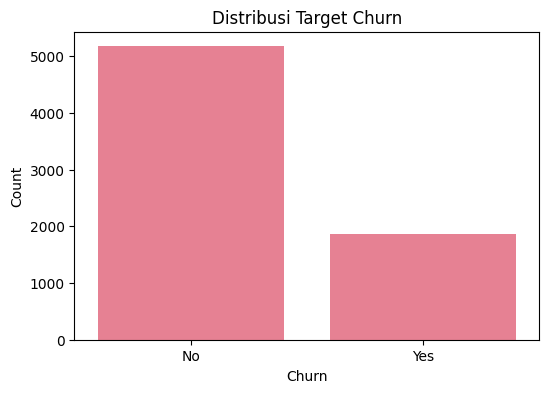

In [ ]:
# 4.4 Analisis target variable
print("=== DISTRIBUSI TARGET VARIABLE ===")
target_col = 'Churn'
if target_col in df.columns:
    print(df[target_col].value_counts())
    print(f"Proporsi:\n{df[target_col].value_counts(normalize=True)}")

    # Visualisasi distribusi target
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_col, data=df)
    plt.title('Distribusi Target Churn')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


=== NUMERICAL COLUMNS ===
['SeniorCitizen', 'tenure', 'MonthlyCharges']


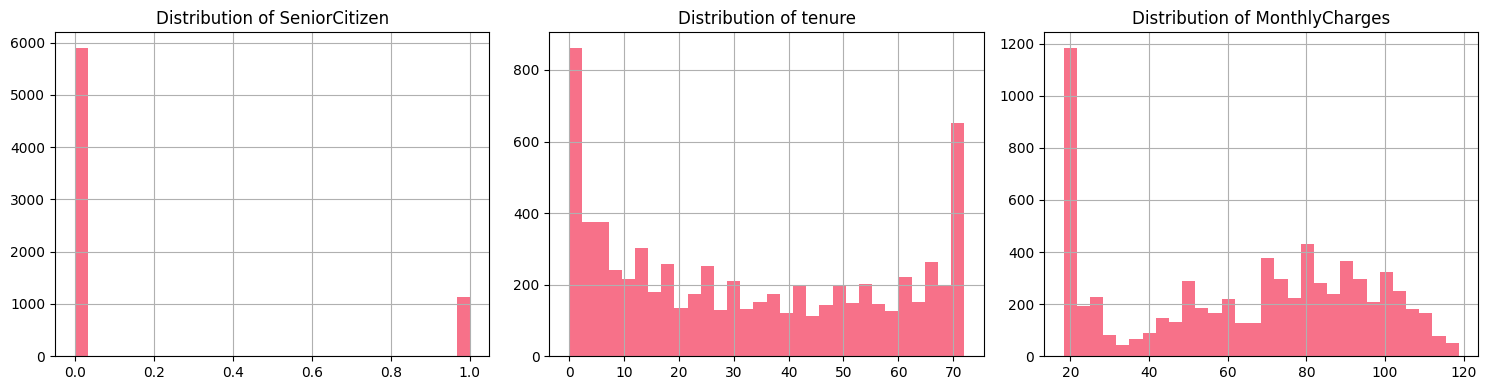

In [ ]:
# 4.5 Analisis numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\n=== NUMERICAL COLUMNS ===")
print(list(numerical_cols))

n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Ceiling division

if len(numerical_cols) > 0:
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))

    # Jika cuma 1 subplot, axes bukan array -> jadiin array
    if len(numerical_cols) == 1:
        axes = np.array([axes])
    else:
        axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        df[col].hist(bins=30, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

    # Hide unused axes
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    plt.tight_layout()
    plt.show()


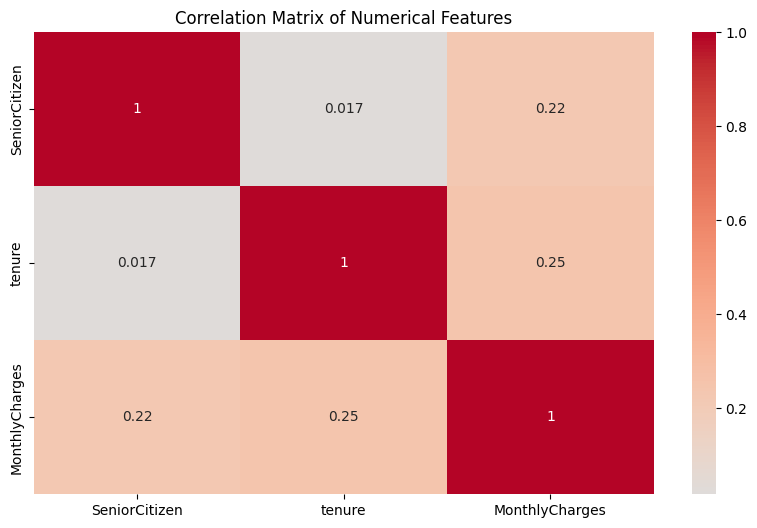

In [ ]:
# 4.6 Correlation matrix
if len(numerical_cols) > 1:
    plt.figure(figsize=(10,6))
    corr = df[numerical_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

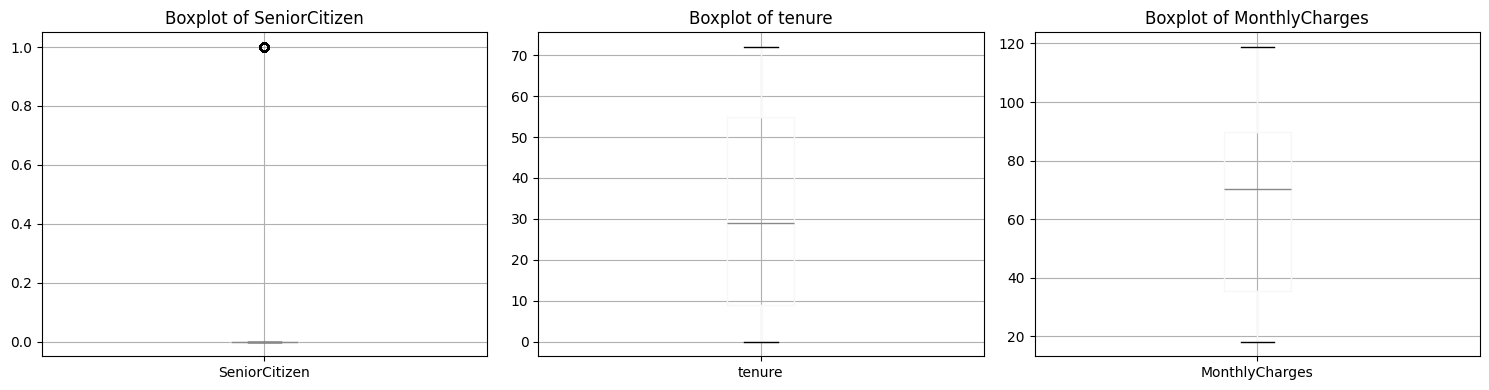

In [ ]:
# 4.7 Boxplot untuk deteksi outlier
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

if len(numerical_cols) > 0:
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
    # pastikan axes selalu array 1 dimensi
    if len(numerical_cols) == 1:
        axes = np.array([axes])
    else:
        axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')

    # Hide unused axes
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    plt.tight_layout()
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, kita akan melakukan preprocessing data untuk mempersiapkan data agar siap digunakan untuk training model machine learning.

In [ ]:
# ================================================
# 5. Data Preprocessing
# ================================================

# 5.1 Copy dataset
df_processed = df.copy()

# 5.2 Handle Missing Values
print("\n=== HANDLING MISSING VALUES ===")
# TotalCharges harus dikonversi ke numerik, karena di dataset asli kadang kosong string " "
if 'TotalCharges' in df_processed.columns:
    df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')
for col in df_processed.columns:
    if df_processed[col].isnull().sum() > 0:
        if df_processed[col].dtype in ['int64', 'float64']:
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
            print(f"Filled {col} (numerical) with median")
        else:
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
            print(f"Filled {col} (categorical) with mode")
print("Sisa missing values setelah treatment:", df_processed.isnull().sum().sum())

# 5.3 Remove Duplicates
print("\n=== REMOVE DUPLICATES ===")
print(f"Duplicate rows sebelum: {df_processed.duplicated().sum()}")
df_processed = df_processed.drop_duplicates()
print(f"Duplicate rows setelah: {df_processed.duplicated().sum()}")
print(f"Shape setelah remove duplicates: {df_processed.shape}")

# 5.4 Handle Outliers (capping menggunakan IQR)
print("\n=== HANDLE OUTLIERS (CAPPING) ===")
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if col != target_col:  # Jangan ubah kolom target
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_before = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()
        df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
        df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])
        outliers_after = ((df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)).sum()
        if outliers_before > 0:
            print(f"{col}: {outliers_before} outliers capped")


=== HANDLING MISSING VALUES ===
Filled TotalCharges (numerical) with median
Sisa missing values setelah treatment: 0

=== REMOVE DUPLICATES ===
Duplicate rows sebelum: 0
Duplicate rows setelah: 0
Shape setelah remove duplicates: (7043, 21)

=== HANDLE OUTLIERS (CAPPING) ===
SeniorCitizen: 1142 outliers capped


In [ ]:
# Tetapkan kolom target secara eksplisit (JANGAN GANTI dengan loan_status, biar aman)
target_col = 'Churn'

# 5.5 Drop kolom yang tidak dipakai (misal customerID)
if 'customerID' in df_processed.columns:
    df_processed = df_processed.drop('customerID', axis=1)

# 5.6 Encoding Categorical Variables
print("\n=== ENCODING CATEGORICAL VARIABLES ===")
categorical_cols = df_processed.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != target_col]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {len(le.classes_)} categories")

# Khusus target (Churn), map ke 0/1
if set(df_processed[target_col].unique()) == set(['Yes', 'No']):
    df_processed[target_col] = df_processed[target_col].map({'Yes':1, 'No':0})

# 5.7 Feature Scaling
print("\n=== FEATURE SCALING ===")
X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
print(f"Features shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")



=== ENCODING CATEGORICAL VARIABLES ===
Encoded gender: 2 categories
Encoded Partner: 2 categories
Encoded Dependents: 2 categories
Encoded PhoneService: 2 categories
Encoded MultipleLines: 3 categories
Encoded InternetService: 3 categories
Encoded OnlineSecurity: 3 categories
Encoded OnlineBackup: 3 categories
Encoded DeviceProtection: 3 categories
Encoded TechSupport: 3 categories
Encoded StreamingTV: 3 categories
Encoded StreamingMovies: 3 categories
Encoded Contract: 3 categories
Encoded PaperlessBilling: 2 categories
Encoded PaymentMethod: 4 categories

=== FEATURE SCALING ===
Features shape: (7043, 19)
Target shape: (7043,)


In [ ]:
# 5.8 Train-Test Split
print("\n=== TRAIN-TEST SPLIT ===")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribution:\n{y_train.value_counts()}")
print(f"y_test distribution:\n{y_test.value_counts()}")

# 5.9 Save Preprocessed Data & Preprocessors (opsional)
import os
os.makedirs('preprocessing_telco', exist_ok=True)
X_train.to_csv('preprocessing_telco/X_train.csv', index=False)
X_test.to_csv('preprocessing_telco/X_test.csv', index=False)
y_train.to_csv('preprocessing_telco/y_train.csv', index=False)
y_test.to_csv('preprocessing_telco/y_test.csv', index=False)

import joblib
joblib.dump(scaler, 'preprocessing_telco/scaler.pkl')
joblib.dump(label_encoders, 'preprocessing_telco/label_encoders.pkl')
print("Preprocessed data & preprocessors telah disimpan di folder 'preprocessing_telco/'.")

# 5.10 Quick Model Test
print("\n=== QUICK MODEL TEST ===")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Quick test accuracy dengan Random Forest: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\n=== PREPROCESSING SELESAI ===")
print("Data siap untuk tahap modeling selanjutnya!")


=== TRAIN-TEST SPLIT ===
X_train shape: (5634, 19)
X_test shape: (1409, 19)
y_train distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64
y_test distribution:
Churn
0    1035
1     374
Name: count, dtype: int64
Preprocessed data & preprocessors telah disimpan di folder 'preprocessing_telco/'.

=== QUICK MODEL TEST ===
Quick test accuracy dengan Random Forest: 0.7857
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409


=== PREPROCESSING SELESAI ===
Data siap untuk tahap modeling selanjutnya!
